Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

Reading the dataset

In [3]:
df=pd.read_csv(r"C:\Users\surya pavan\Downloads\Women's E-commerce Clothing Reviews\Womens Clothing E-Commerce Reviews.csv")

Displaying first 5 rows of data

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Displaying the shape of dataset

In [5]:
df.shape

(23486, 11)

Information of Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


We can see that, column with column name "Unnamed" is not necessary, Dropping that column.

In [7]:
df.drop(columns=['Unnamed: 0'],axis=0,inplace=True)

In [8]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


#####  Checking Duplicates in the dataset

In [9]:
df.duplicated().sum()


21

In [10]:
print(df.shape)

(23486, 10)


There are 21 duplicates. now, we are dropping the duplicates 

In [11]:
df.drop_duplicates(inplace=True)


In [12]:
df.shape

(23465, 10)

Describing the continuous features with mean, std and etc., properties

In [13]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000
mean,918.096825,43.200128,4.195355,0.822203,2.538206
std,203.362035,12.280712,1.110278,0.382350,5.704248
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


Checking the null values in dataset

In [14]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3789
Review Text                 825
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

There are 3789 null values present in "Title", and 825 null values in Review Text features. 

These 2 features has the most null values.

I would like to go with dropping the null values present in the review text,as that is the feature we used to get the prediction of recommendation. 

The NaN values present in "Review Text" consistes of only 3% of no.of rows in the entire dataset.

After that, will fill the NaN values for all the other features.

Dropping the rows, which has NaN values in Review Text column

In [15]:
df.dropna(axis=0,how='any',subset=['Review Text'],inplace=True)

825 rows with NaN values in Review Text feature has been removed from the dataset, Now rows count is 22640

In [16]:
df.shape

(22640, 10)

In [17]:
df.tail()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [18]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      2965
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

Filling all the null values with Back Fill method in pandas, and these features are used for analysis.
Features of Division Name,Department Name, Class Name having very less number of null values, which doesn't even constitute of 0.001%, so we are filling with consecutive row text.

In [19]:
df.bfill(axis=0,inplace=True)

In [20]:
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

We can see that, no null values present in the dataset.

## Exploratory Data Analysis

In [21]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Some major design flaws,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Some major design flaws,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [22]:
df['Clothing ID'].nunique()

1179

For 1179 unique Clothing ID's, Which means for 1179 clothing products. we have 22640 reviews.

###### What are the Clothing ID's, that are purchased most.

In [23]:
num_of_cloth=df.groupby('Clothing ID').size().sort_values(ascending=False).reset_index().head(50)
num_of_cloth.rename(columns={0:"Count"},inplace=True)

<AxesSubplot:xlabel='Clothing ID', ylabel='Count'>

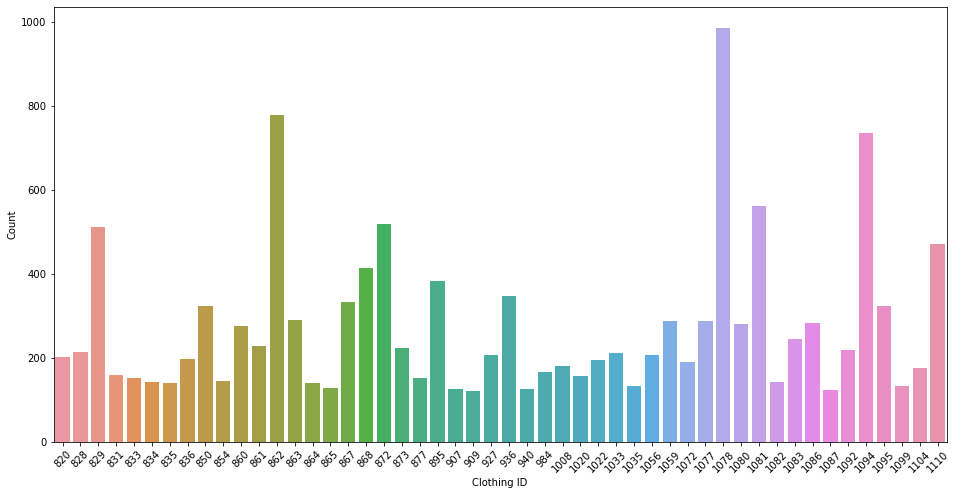

In [24]:
plt.rcParams['figure.figsize']=(16,8)
plt.xticks(rotation=45)
sns.barplot(x=num_of_cloth['Clothing ID'],y=num_of_cloth['Count'],data=num_of_cloth)

Clothing ID of 1078,1094,862,1081,829,1110 are purchased most.Approx 1000 products of Clothing ID - 1078 has been purchased.

In the Age Feature, We are trying to know the maximum and minimum age.

In [25]:
print('Maximum Age :',df['Age'].max() ,
      'Minimum Age :',df['Age'].min())

Maximum Age : 99 Minimum Age : 18


99 is the maximum age and 18 is the minimum age, According to this, we can make some portions, so that, we can try to find,




##### Women with categorizing age groups, reviewing the most

In [26]:
age_range = [10*i for i in range(1,10)]
new_df=pd.DataFrame(columns=['AGE_RANGE'])
def age_cat(x):
    for enu, ran in enumerate(age_range):
        if x>=ran and x<=ran+9:
            return(str(ran)+" to "+str(ran+9))

In [27]:
df['AGE_RANGE']=df['Age'].apply(lambda x: age_cat(x))
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,AGE_RANGE
0,767,33,Some major design flaws,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,30 to 39
1,1080,34,Some major design flaws,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,30 to 39
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60 to 69
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,50 to 59
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,40 to 49


In [28]:
Ag=df['AGE_RANGE'].value_counts().reset_index()
Ag

,index,AGE_RANGE
0,30 to 39,7345
1,40 to 49,5903
2,50 to 59,3834
3,20 to 29,2795
4,60 to 69,2256
5,70 to 79,355
6,80 to 89,94
7,10 to 19,44
8,90 to 99,14


<AxesSubplot:xlabel='index', ylabel='AGE_RANGE'>

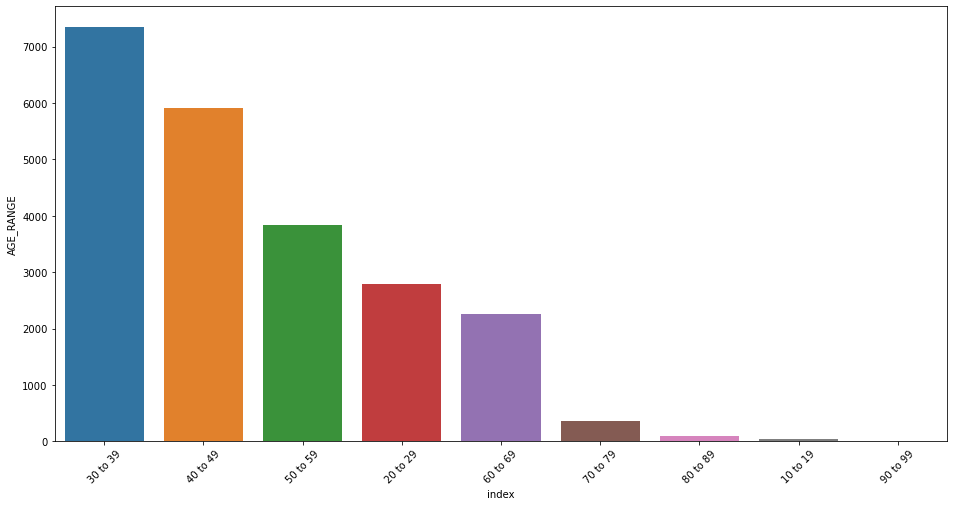

In [29]:
plt.rcParams['figure.figsize']=(16,8)
plt.xticks(rotation=45)
sns.barplot(x=Ag['index'],y=Ag['AGE_RANGE'],data=Ag,)

Women with Age Group "30-39" reviews the most.We can also say that, this age group women bought the most

##### Women with age group recommending the cloths

In [30]:
age_rec=df.groupby(['AGE_RANGE','Recommended IND']).size().reset_index()
age_rec.rename(columns={0:'Count'},inplace=True)

<AxesSubplot:xlabel='AGE_RANGE', ylabel='Count'>

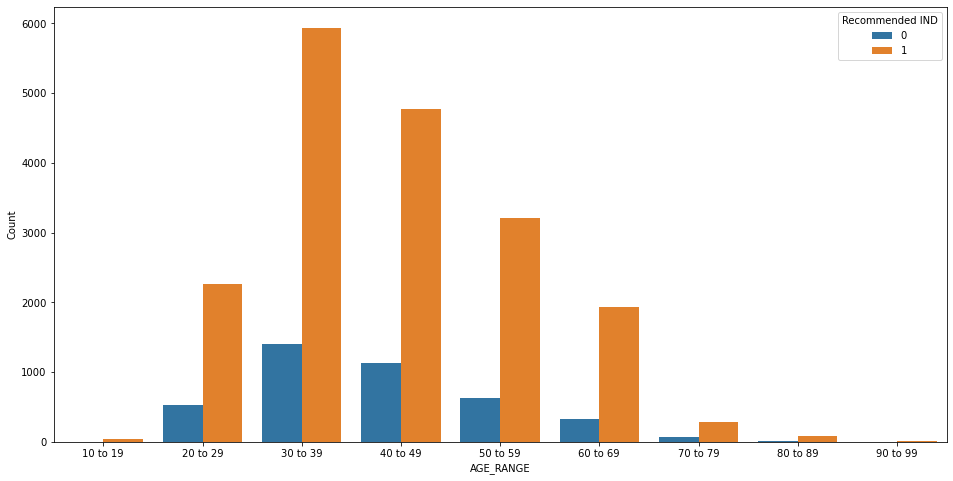

In [31]:
sns.barplot(x=age_rec['AGE_RANGE'],y=age_rec['Count'],data=age_rec,hue=age_rec['Recommended IND'])

previously, We observe that, Women with age-group 30-39 reviews the most and here the same scenario, most of the reviewing women are recommending the cloths.

With refernce to the above graph, we say that, each age group women are Recommending the E-Commerce site to purchase, No such particular age is not recommending the site. It means, the Website is liked and suitable to all age groups of women.

In [32]:
recomm=df.groupby(['AGE_RANGE','Rating']).size().reset_index()
recomm.rename(columns={0:'Count'},inplace=True)

<AxesSubplot:xlabel='AGE_RANGE', ylabel='Count'>

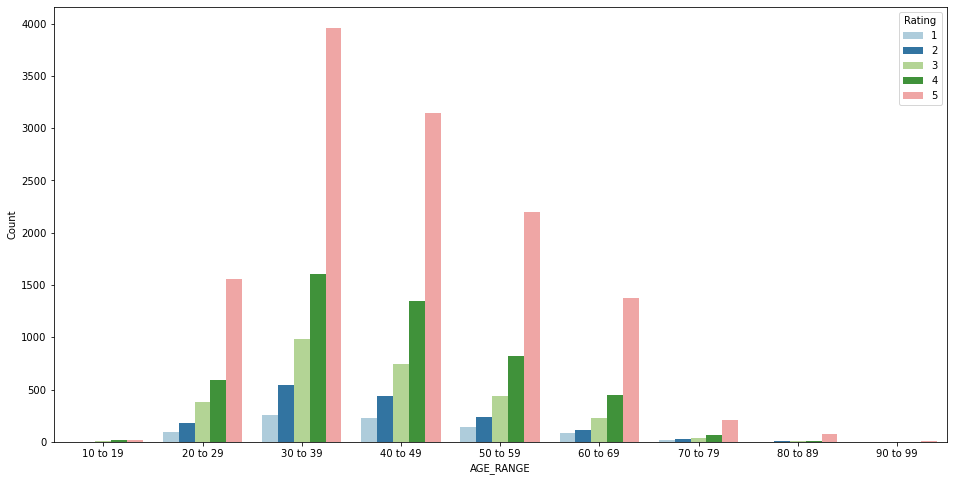

In [33]:
sns.barplot(x=recomm['AGE_RANGE'],y=recomm['Count'],data=recomm,hue=recomm['Rating'],palette="Paired")

 women in the age-group of 20-70 have given 5 rating in big count, as seen above in the bar chart.

##### Distribution of rating of reviews 

In [34]:
Rat=df['Rating'].value_counts().reset_index()
Rat

,index,Rating
0,5,12539
1,4,4908
2,3,2823
3,2,1549
4,1,821


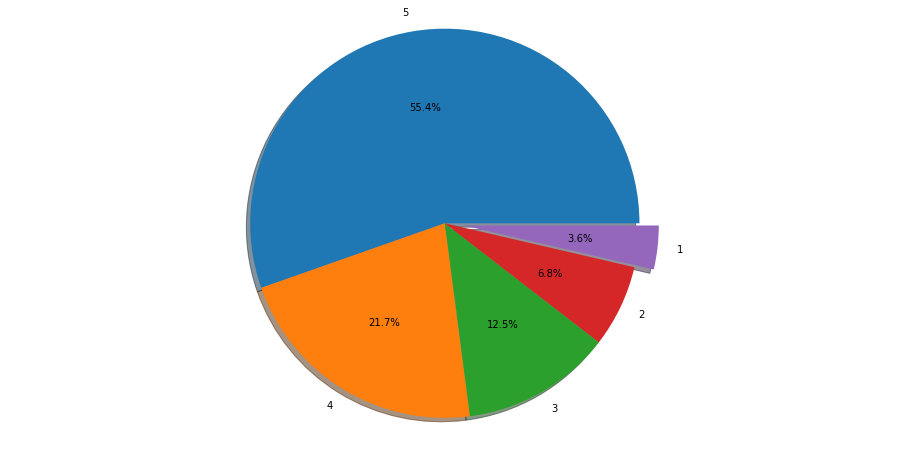

In [35]:
fig1, ax1 = plt.subplots()
ax1.pie(Rat['Rating'], explode=(0, 0, 0, 0,0.1), labels=Rat['index'], autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')
plt.show()

We have 22640 rows in the dataset, in that 55.4% of the women, gave 5 rating to the clothes.

We can clearly observe the pie chart with Rating percentages.

If we relate these ratings to age group, as previously bar graphed, most women in 30-40 range, gives 5 rating and they are reviewing the most, which indicates, most of the E-Commerce customers are of that age group only.

In [36]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,AGE_RANGE
0,767,33,Some major design flaws,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,30 to 39
1,1080,34,Some major design flaws,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,30 to 39
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60 to 69
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,50 to 59
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,40 to 49


Let's know,reviews of women are recommending the cloths, if they have given less than or equal to 3 rating.

In [37]:
recrat=df.groupby(['Rating','Recommended IND']).size().reset_index()
recrat.rename(columns={0:'Count'},inplace=True)
recrat

,Rating,Recommended IND,Count
0,1,0,806
1,1,1,15
2,2,0,1455
3,2,1,94
4,3,0,1653
5,3,1,1170
6,4,0,164
7,4,1,4744
8,5,0,23
9,5,1,12516


<AxesSubplot:xlabel='Rating', ylabel='Count'>

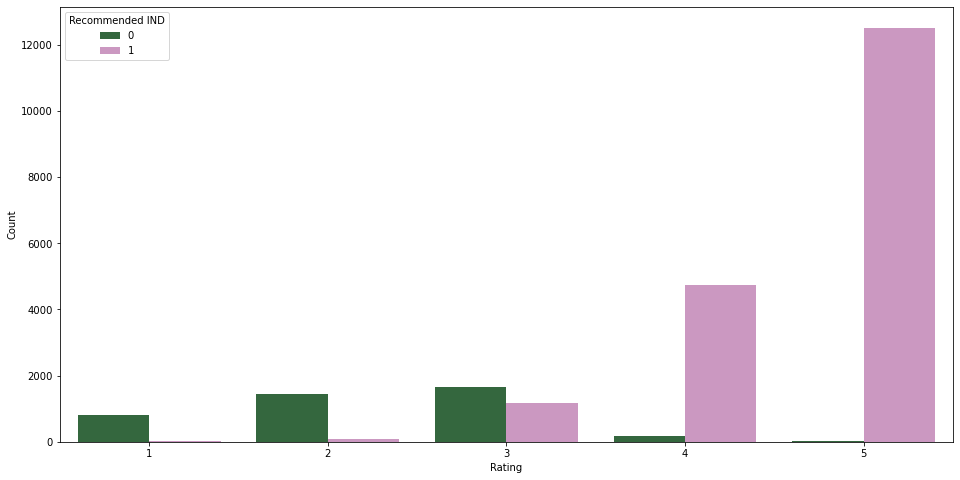

In [38]:
sns.barplot(x=recrat['Rating'],y=recrat['Count'],hue=recrat['Recommended IND'],data=recrat,palette='cubehelix')

From the above barplot, we can get some useful insights,

1.As the rating increases, the recommendations are increasing copiously, and inversely reviews of not recommending are decreasing.

2.At rating 3, reviews that are recommending the cloths are "1170" and not recommending the clothes are "1653". The difference between both is 500.
Which indicates, most reviews are not recommending.

3.We can literally say that, 90-99% of reviews of women, who has given rating as 4 or 5, are definitely recommending the E-Commerce Clothing site to purchase clothes.

4.The total number of people who are not recommending at the rating level of 1 and 2 and 3 are approx 4000 out of 22465 reviews.

##### Distribution of Recommending and Not Recommending.

In [39]:
df['Recommended IND'].value_counts()

1    18539
0     4101
Name: Recommended IND, dtype: int64

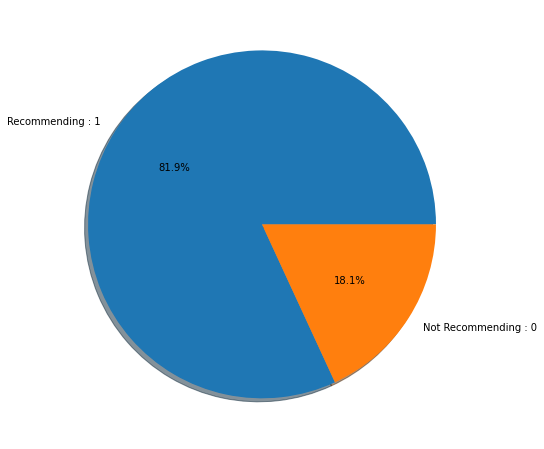

In [40]:
plt.pie(df['Recommended IND'].value_counts(),labels=["Recommending : 1","Not Recommending : 0"],autopct="%1.1f%%",shadow=True)
plt.show()

Only 18.1% of reviews of women, are not recommending the E-Commerce Clothing Website.

This percentage of Not Recommending is not that of high, to say the website is Not fit

##### Division Name Category Distribution

In [41]:
df['Division Name'].value_counts()

General           13370
General Petite     7842
Initmates          1428
Name: Division Name, dtype: int64

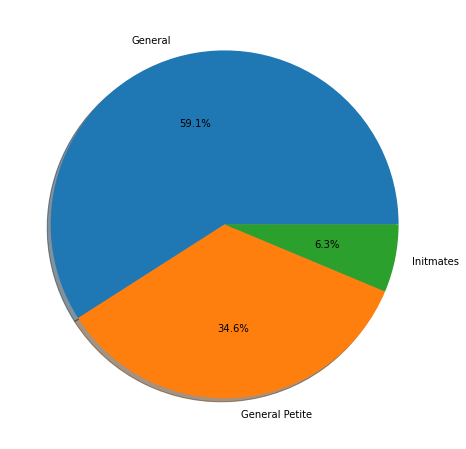

In [42]:
plt.pie(df['Division Name'].value_counts(),labels=["General","General Petite",'Initmates'],autopct="%1.1f%%",shadow=True)
plt.show()

Most of the reviews are regarding to General Division.

Which we can say, women had done more purchases in General Division and the least purchased division is Intimates.

##### Let's visualize, for each category in division, what are recommendation s and Ratings

In [43]:
gr1=df.groupby(['Division Name','Recommended IND']).size().reset_index()

In [44]:
gr1.rename(columns={0:"Count"},inplace=True)

<AxesSubplot:xlabel='Division Name', ylabel='Count'>

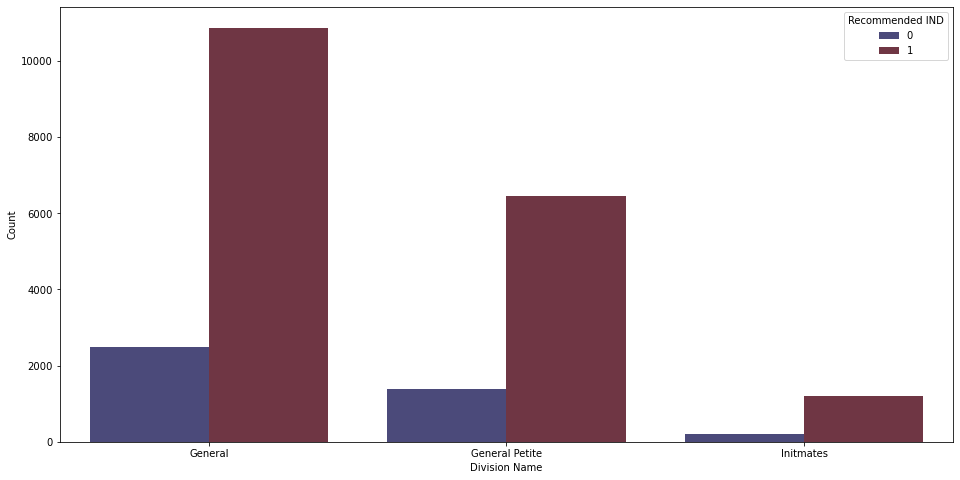

In [45]:
sns.barplot(x=gr1['Division Name'],y=gr1['Count'],hue=gr1['Recommended IND'],palette="icefire")

Reviews of women in each category of division,Count of not Recommending are smaller in ratio compared to Recommending.


In [46]:
gr2=df.groupby(["Division Name",'Rating']).size().reset_index()
gr2.rename(columns={0:"Count"},inplace=True)

In [47]:
gr2

,Division Name,Rating,Count
0,General,1,479
1,General,2,950
2,General,3,1740
3,General,4,2910
4,General,5,7291
5,General Petite,1,291
6,General Petite,2,524
7,General Petite,3,929
8,General Petite,4,1702
9,General Petite,5,4396


<AxesSubplot:xlabel='Division Name', ylabel='Count'>

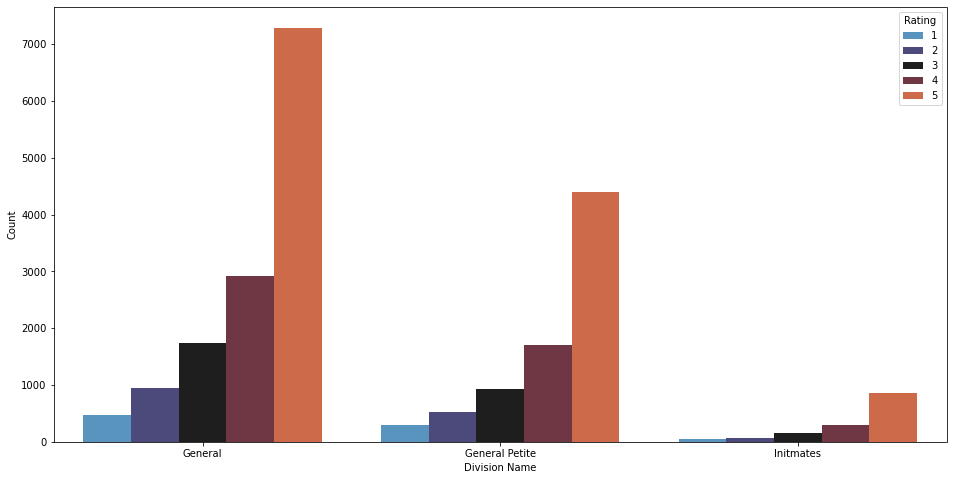

In [48]:
sns.barplot(x=gr2['Division Name'],y=gr2['Count'],hue=gr2['Rating'],palette="icefire")

The Ratings in each division are shown above, We see max reviews in General divison.In general division, most reviews are rated 5 and same as in other divisions too.


In [49]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,AGE_RANGE
0,767,33,Some major design flaws,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,30 to 39
1,1080,34,Some major design flaws,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,30 to 39
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60 to 69
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,50 to 59
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,40 to 49


##### Visualizing Department name feature

In [50]:
df['Department Name'].value_counts()

Tops        10048
Dresses      6151
Bottoms      3664
Intimate     1656
Jackets      1003
Trend         118
Name: Department Name, dtype: int64

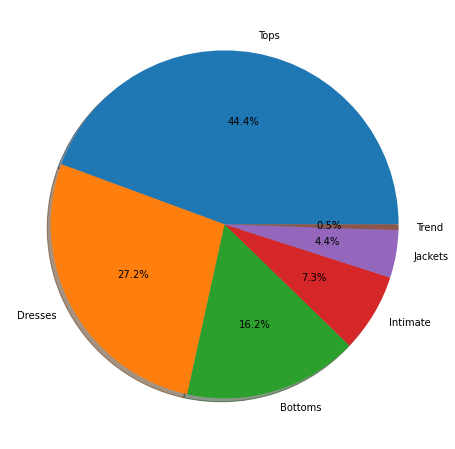

In [51]:
plt.pie(df['Department Name'].value_counts(),labels=['Tops','Dresses','Bottoms','Intimate','Jackets','Trend'],shadow=True,autopct="%1.1f%%")
plt.show() 

44.4% of the reviews of women are realted to the Department of "Tops" of women, and next is "Dresses".

They are purchasing most in Tops and Dresses Department.


Let's see the rating with respective to Department name.

In [52]:
gr=df.groupby(['Department Name','Rating']).size().reset_index()

In [53]:
gr.rename(columns={0:"Count"},inplace=True)


<AxesSubplot:xlabel='Department Name', ylabel='Count'>

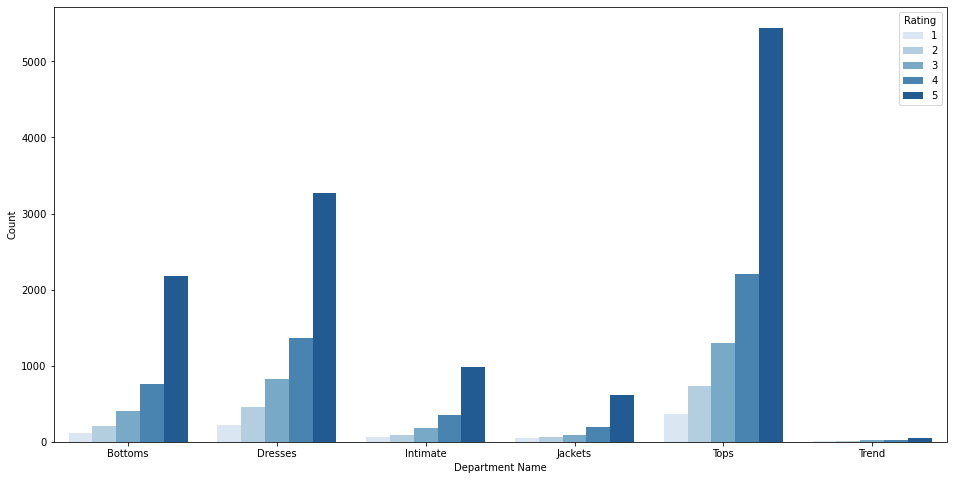

In [54]:
sns.barplot(x=gr['Department Name'],y=gr['Count'],hue=gr['Rating'],palette="Blues")

The ratings count of reviews in each department are significantly iincreasing from 1.

Each department with respective to ratings are good.

#####  Reviews that recommend based on Department Name

In [55]:
xr=df.groupby(['Department Name','Recommended IND']).size().reset_index().rename(columns={0:"Count"})

In [56]:
xr

,Department Name,Recommended IND,Count
0,Bottoms,0,551
1,Bottoms,1,3113
2,Dresses,0,1197
3,Dresses,1,4954
4,Intimate,0,254
5,Intimate,1,1402
6,Jackets,0,167
7,Jackets,1,836
8,Tops,0,1902
9,Tops,1,8146


<AxesSubplot:xlabel='Department Name', ylabel='Count'>

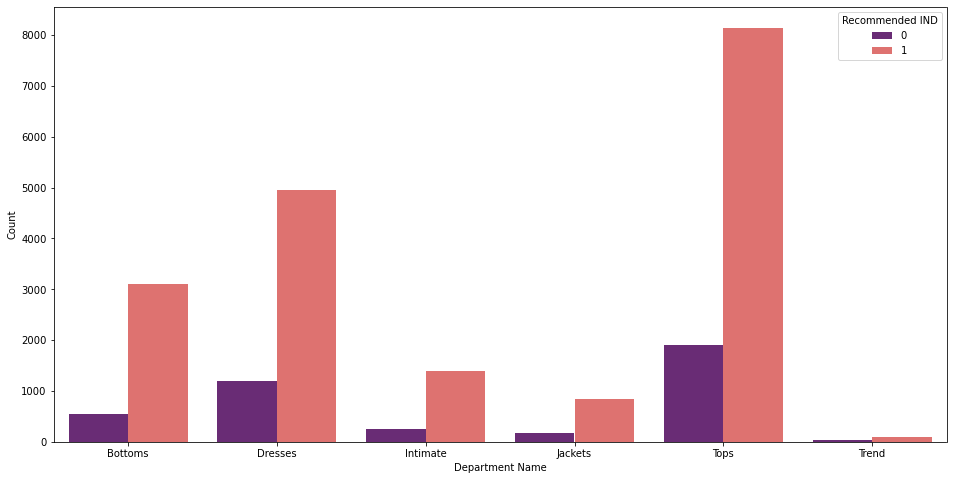

In [57]:
sns.barplot(x=xr['Department Name'],y=xr['Count'],hue=xr['Recommended IND'],palette="magma")

Tops, Dresses, Bottoms are more recommended in high numbers and for all the departments, recommendations to that particular department is higher than count of not recommendations.

This indicates that all the departments have good demand and value too. No department has negative analytics.

Trend department has less reviews and means, the sales are low to this type. This department has only 118 reviews out of 22640. 

In [58]:
group=df.groupby('Class Name').size().sort_values(ascending=False).reset_index().rename(columns={0:'Count'})

In [59]:
group.tail()

,Class Name,Count
15,Intimates,148
16,Layering,132
17,Trend,118
18,Casual bottoms,1
19,Chemises,1


<AxesSubplot:xlabel='Class Name', ylabel='Count'>

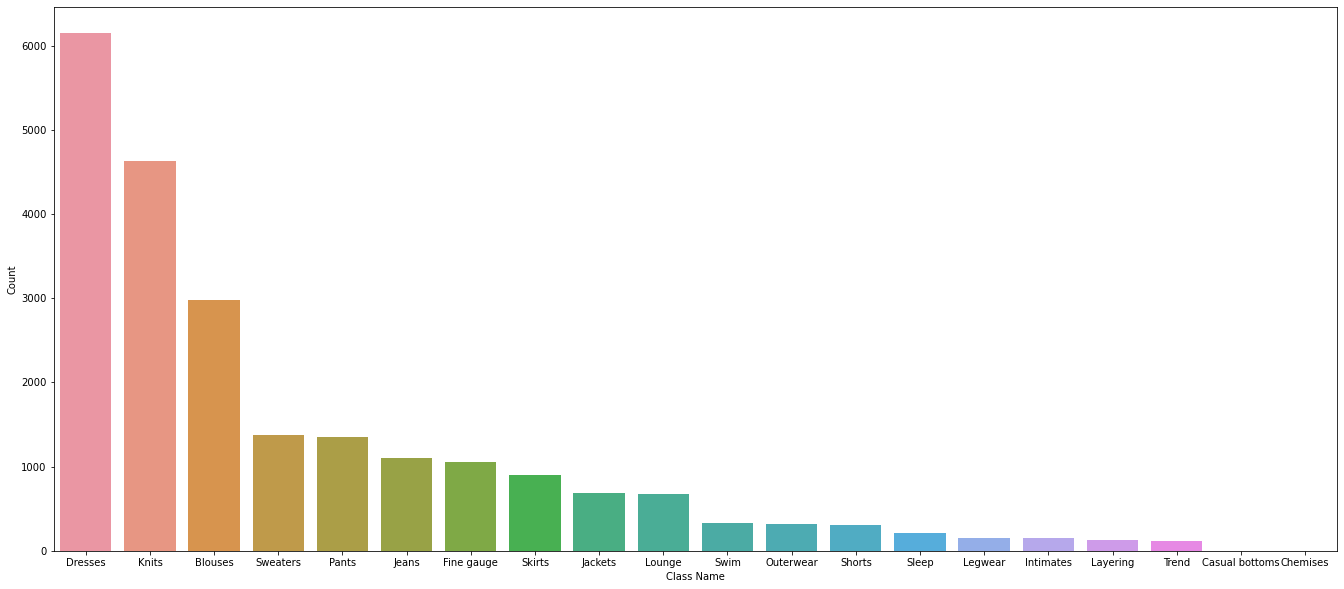

In [60]:
plt.rcParams['figure.figsize']=(23,10)
sns.barplot(x=group['Class Name'],y=group['Count'])

From the above bar graph, we observe that, reviews for the Class Name of Dresses are more than all the other class names.

Class Names of Casual and Chemises have only one review each. It says that, this products are bought very less and have very minimal demand in E-Commerce Womens Clothing Site.



In [61]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,AGE_RANGE
0,767,33,Some major design flaws,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,30 to 39
1,1080,34,Some major design flaws,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,30 to 39
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60 to 69
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,50 to 59
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,40 to 49


#####  Visualising Age Range with Department Name and Class Name

In [62]:
dep_cl=df.groupby(['Department Name','AGE_RANGE']).size().reset_index().rename(columns={0:'Count'})

<AxesSubplot:xlabel='Department Name', ylabel='Count'>

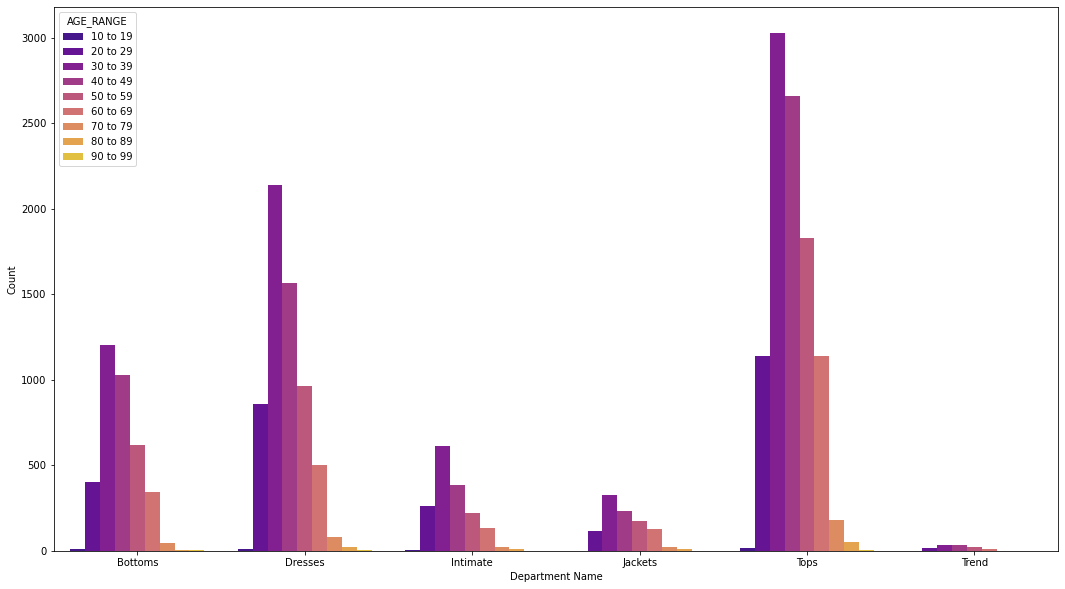

In [63]:
plt.rcParams['figure.figsize']=(18,10)
sns.barplot(x=dep_cl['Department Name'],y=dep_cl['Count'],hue=dep_cl['AGE_RANGE'],palette='plasma')

In each Department name, the reviews are more or high at the age group of 30-39.

This 30-39 age group womens, bought the most than all other age groups.

In [64]:
cl_ag=df.groupby(['Class Name','AGE_RANGE']).size().reset_index().rename(columns={0:'Count'})

<AxesSubplot:xlabel='Class Name', ylabel='Count'>

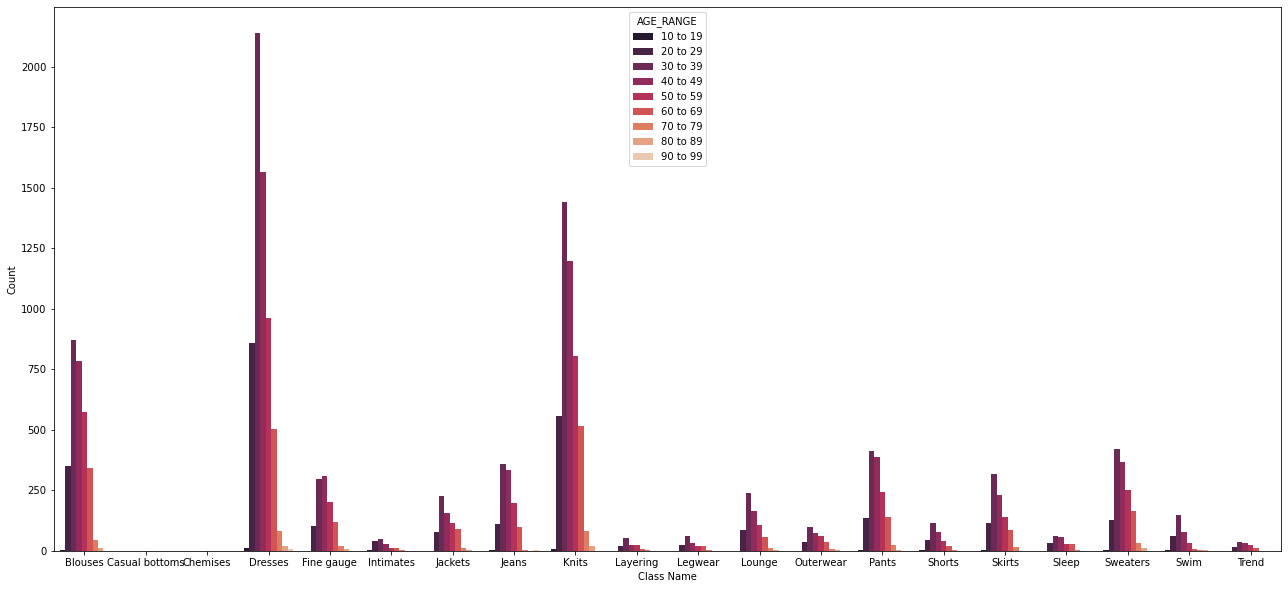

In [65]:
plt.rcParams['figure.figsize']=(22,10)
sns.barplot(x=cl_ag['Class Name'],y=cl_ag['Count'],hue=cl_ag['AGE_RANGE'],palette='rocket')

Except for Casual Bottoms and Chemises types of class names,all other class names has reviews of all age groups and in all clas names, age group of 30-39 have the most.

In [66]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,AGE_RANGE
0,767,33,Some major design flaws,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,30 to 39
1,1080,34,Some major design flaws,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,30 to 39
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60 to 69
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,50 to 59
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,40 to 49


#####  Top 20 Titles

In [67]:
 df['Title'].value_counts()[:20]

Love it!            149
Beautiful           105
Love                100
Love!                94
Beautiful!           76
Love it              65
Beautiful dress      65
Cute top             62
Disappointed         62
Gorgeous             59
Perfect              58
Love this dress!     57
Great dress          56
Great top            51
Adorable             47
Super cute           46
Not for me           44
Love this dress      42
Runs small           41
Cute                 40
Name: Title, dtype: int64

<AxesSubplot:>

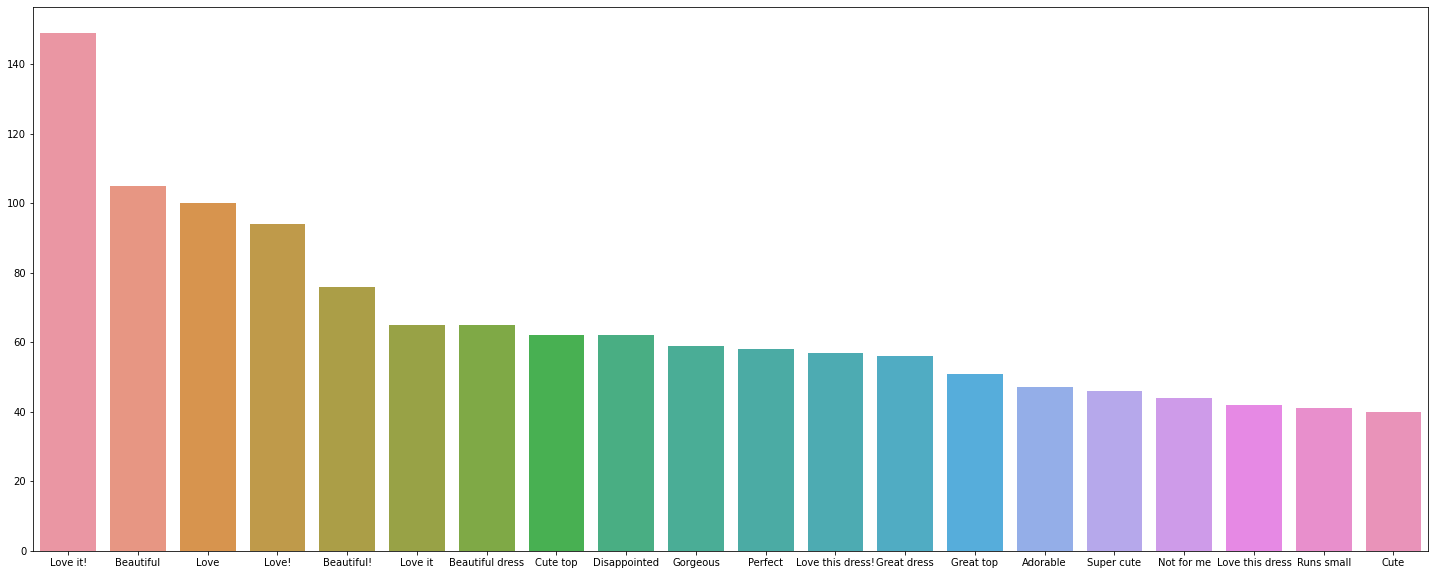

In [68]:
plt.rcParams['figure.figsize']=(25,10)
sns.barplot(x=df['Title'].value_counts()[:20].index,y= df['Title'].value_counts()[:20].values)

Out of all first top 20 value counted title, only 3 are in negative(1:"Dissapointed",2:"Not For Me",3":"Runs Small"), except this all the other are positive.

###### As we have seen in above analysis of Recommendation IND, the data was looking unbalanced, So our first step before moving into Pre-Processing is Making the data balanced.

In [69]:
from sklearn.utils import resample

##### Before sampling 

<AxesSubplot:ylabel='Recommended IND'>

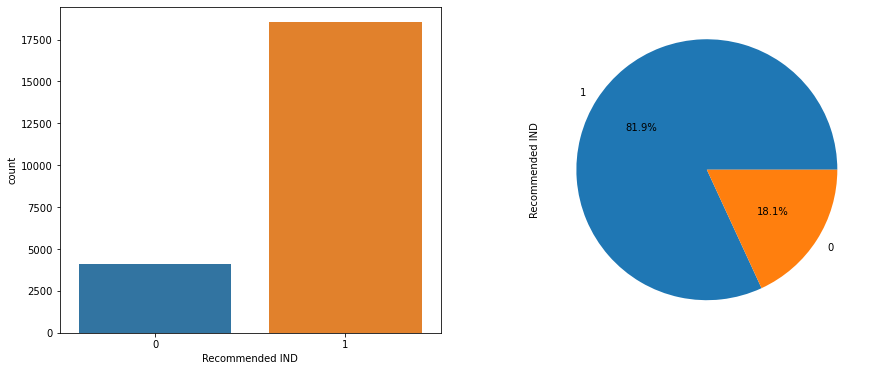

In [70]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=df['Recommended IND'])
plt.subplot(1, 2, 2)
df['Recommended IND'].value_counts().plot.pie(y='Class',autopct="%1.1f%%")

In [71]:
df['Recommended IND'].value_counts()

1    18539
0     4101
Name: Recommended IND, dtype: int64

##### Resampling the minority data(Recommended IND=0)

In [72]:
majority=df[df['Recommended IND']==1]
minority=df[df['Recommended IND']==0]
df_new=resample(minority,replace=True,n_samples=17000,random_state=42)

In [73]:
df_new.shape

(17000, 11)

In [74]:
df_upsampled=pd.concat([df_new,majority])

##### After Resampling

<AxesSubplot:ylabel='Recommended IND'>

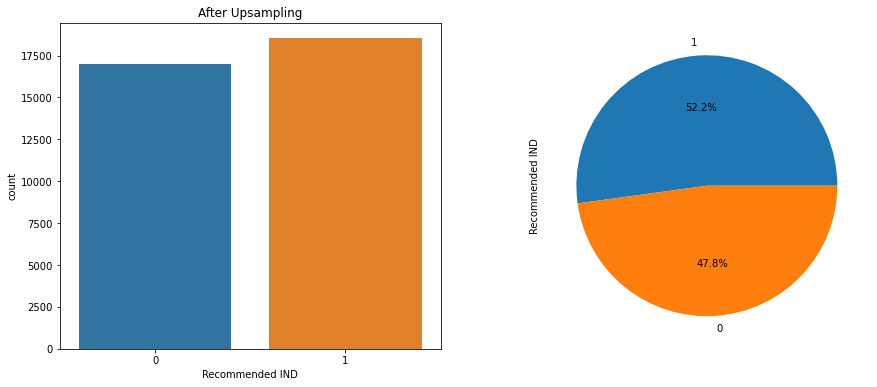

In [75]:
plt.figure(figsize = (15, 6))
ax=plt.subplot(1, 2, 1)
sns.countplot(x=df_upsampled['Recommended IND'])
ax.set_title('After Upsampling')
plt.subplot(1, 2, 2)
df_upsampled['Recommended IND'].value_counts().plot.pie(y='Class',autopct="%1.1f%%")

In [76]:
df_upsampled.shape

(35539, 11)

# Text Pre-Processing

In [77]:
import spacy
nlp=spacy.load("en_core_web_sm")

In [78]:
df_upsampled.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,AGE_RANGE
4926,1099,35,Removing the liner,I am on the fence about this dress. the fabric...,3,0,26,General,Dresses,Dresses,30 to 39
21598,1086,33,Not great for those with a little extra...,I love everything by cloth & stone so was exci...,2,0,8,General,Dresses,Dresses,30 to 39
17773,819,67,Flattering all around,"Loved the fit and colors, but the fabric is ve...",2,0,18,General,Tops,Blouses,60 to 69
2579,18,42,Disappointing quality,"I ordered these leggings and loved them, for a...",1,0,0,General Petite,Bottoms,Jeans,40 to 49
19705,999,48,Ugh,Not sure who this is for but its not for me. s...,1,0,0,General Petite,Bottoms,Skirts,40 to 49


#####  Making the review text to lower format

In [79]:
def low(x):
    return str(x).lower()


In [80]:
df_upsampled['Review Text']=df_upsampled['Review Text'].apply(lambda x: low(x))

In [81]:
df_upsampled.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,AGE_RANGE
4926,1099,35,Removing the liner,i am on the fence about this dress. the fabric...,3,0,26,General,Dresses,Dresses,30 to 39
21598,1086,33,Not great for those with a little extra...,i love everything by cloth & stone so was exci...,2,0,8,General,Dresses,Dresses,30 to 39
17773,819,67,Flattering all around,"loved the fit and colors, but the fabric is ve...",2,0,18,General,Tops,Blouses,60 to 69
2579,18,42,Disappointing quality,"i ordered these leggings and loved them, for a...",1,0,0,General Petite,Bottoms,Jeans,40 to 49
19705,999,48,Ugh,not sure who this is for but its not for me. s...,1,0,0,General Petite,Bottoms,Skirts,40 to 49



##### Removing Punctuations from Reviews Text

In [82]:
def rem_punct(x):
    listt=[]
    doc=nlp(x)
    s=" "
    for token in doc:
        if not token.is_punct:
            listt.append(str(token))
    
    #listt=[token for token in doc if not token.is_punct]
    return s.join((listt))

In [83]:
df_upsampled['Reviews_Cleaned']=df_upsampled['Review Text'].apply(lambda x:rem_punct(x))

In [84]:
df_upsampled.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,AGE_RANGE,Reviews_Cleaned
4926,1099,35,Removing the liner,i am on the fence about this dress. the fabric...,3,0,26,General,Dresses,Dresses,30 to 39,i am on the fence about this dress the fabric ...
21598,1086,33,Not great for those with a little extra...,i love everything by cloth & stone so was exci...,2,0,8,General,Dresses,Dresses,30 to 39,i love everything by cloth stone so was excite...
17773,819,67,Flattering all around,"loved the fit and colors, but the fabric is ve...",2,0,18,General,Tops,Blouses,60 to 69,loved the fit and colors but the fabric is ver...
2579,18,42,Disappointing quality,"i ordered these leggings and loved them, for a...",1,0,0,General Petite,Bottoms,Jeans,40 to 49,i ordered these leggings and loved them for ab...
19705,999,48,Ugh,not sure who this is for but its not for me. s...,1,0,0,General Petite,Bottoms,Skirts,40 to 49,not sure who this is for but its not for me sk...


All the punctuations in the review text has been removed.

#####  Removing "NOT" from Stop Words and Removing stop words

In [85]:
def stop(x):
    dox=nlp(x)
    nlp.vocab['not'].is_stop=False
    listt=[str(token) for token in dox if not token.is_stop]
    return " ".join(listt)

In [86]:
df_upsampled['Reviews_Cleaned']=df_upsampled['Reviews_Cleaned'].apply(lambda x: stop(x))

In [87]:
df_upsampled.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,AGE_RANGE,Reviews_Cleaned
4926,1099,35,Removing the liner,i am on the fence about this dress. the fabric...,3,0,26,General,Dresses,Dresses,30 to 39,fence dress fabric gorgeous soft hoping fit sl...
21598,1086,33,Not great for those with a little extra...,i love everything by cloth & stone so was exci...,2,0,8,General,Dresses,Dresses,30 to 39,love cloth stone excited dress hooray ordered ...
17773,819,67,Flattering all around,"loved the fit and colors, but the fabric is ve...",2,0,18,General,Tops,Blouses,60 to 69,loved fit colors fabric thin tried nude cami u...
2579,18,42,Disappointing quality,"i ordered these leggings and loved them, for a...",1,0,0,General Petite,Bottoms,Jeans,40 to 49,ordered leggings loved hour- point belt loop r...
19705,999,48,Ugh,not sure who this is for but its not for me. s...,1,0,0,General Petite,Bottoms,Skirts,40 to 49,not sure not skirt long stiff puffy hips not l...


##### Removing Numbers from the Review text

In [88]:
def num(x):
    dox=nlp(x)
    listt=[str(token) for token in dox if token.is_alpha]
    return " ".join(listt)

In [89]:
df_upsampled['Reviews_Cleaned']=df_upsampled['Reviews_Cleaned'].apply(lambda x: num(x))

In [90]:
df_upsampled.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,AGE_RANGE,Reviews_Cleaned
4926,1099,35,Removing the liner,i am on the fence about this dress. the fabric...,3,0,26,General,Dresses,Dresses,30 to 39,fence dress fabric gorgeous soft hoping fit sl...
21598,1086,33,Not great for those with a little extra...,i love everything by cloth & stone so was exci...,2,0,8,General,Dresses,Dresses,30 to 39,love cloth stone excited dress hooray ordered ...
17773,819,67,Flattering all around,"loved the fit and colors, but the fabric is ve...",2,0,18,General,Tops,Blouses,60 to 69,loved fit colors fabric thin tried nude cami u...
2579,18,42,Disappointing quality,"i ordered these leggings and loved them, for a...",1,0,0,General Petite,Bottoms,Jeans,40 to 49,ordered leggings loved point belt loop ripped ...
19705,999,48,Ugh,not sure who this is for but its not for me. s...,1,0,0,General Petite,Bottoms,Skirts,40 to 49,not sure not skirt long stiff puffy hips not l...


##### Applying Lematisation to Review Text

In [91]:
def lem(x):
    dox=nlp(x)
    listt=[str(token) for token in dox if token.lemma_]
    return " ".join(listt)

In [92]:
df_upsampled['Reviews_Cleaned']=df_upsampled['Reviews_Cleaned'].apply(lambda x: lem(x))

In [93]:
df_upsampled.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,AGE_RANGE,Reviews_Cleaned
4926,1099,35,Removing the liner,i am on the fence about this dress. the fabric...,3,0,26,General,Dresses,Dresses,30 to 39,fence dress fabric gorgeous soft hoping fit sl...
21598,1086,33,Not great for those with a little extra...,i love everything by cloth & stone so was exci...,2,0,8,General,Dresses,Dresses,30 to 39,love cloth stone excited dress hooray ordered ...
17773,819,67,Flattering all around,"loved the fit and colors, but the fabric is ve...",2,0,18,General,Tops,Blouses,60 to 69,loved fit colors fabric thin tried nude cami u...
2579,18,42,Disappointing quality,"i ordered these leggings and loved them, for a...",1,0,0,General Petite,Bottoms,Jeans,40 to 49,ordered leggings loved point belt loop ripped ...
19705,999,48,Ugh,not sure who this is for but its not for me. s...,1,0,0,General Petite,Bottoms,Skirts,40 to 49,not sure not skirt long stiff puffy hips not l...


Now our data is lemmatized and removed punctuations and removed stop words from the "review text" feature.

### Splitting the Data

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline

In [95]:
x=df_upsampled['Reviews_Cleaned']
y=df_upsampled['Recommended IND']

### Splitting the data into Training and testing. Giving 20% of entire data as Test data 

In [96]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y, random_state=42)

In [97]:
y_train.value_counts()

1    14831
0    13600
Name: Recommended IND, dtype: int64

In [98]:
y_test.value_counts()

1    3708
0    3400
Name: Recommended IND, dtype: int64

As we can see the above splitting of recommended and non recommended data in Training and Testing data,It has very small difference.


### Creating Pipelines and fit to the Model.

##### Fitting the data to Naive Bayes Algorithm

We use TF-IDF vectorizer to transform the categorical data into numeric

#### Now Splitting the data with Test Size=0.20, which means taking 20% of data from total dataset.

In [99]:
lister=[MultinomialNB(),RandomForestClassifier(n_estimators=200),SVC(),LogisticRegression()]

<IPython.core.display.Javascript object>

In [100]:
for i in lister:
    pipe7=Pipeline([('vec',TfidfVectorizer()),('model7',i)])
    pipe7.fit(X_train,y_train)
    pipe7_pred=pipe7.predict(X_test)
    print('Accuracy Score of ',i,":",accuracy_score(y_test,pipe7_pred))
    print(classification_report(y_test,pipe7_pred))

Accuracy Score of : 0.8846370287000562
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      3400
           1       0.91      0.87      0.89      3708

    accuracy                           0.88      7108
   macro avg       0.88      0.89      0.88      7108
weighted avg       0.89      0.88      0.88      7108

Accuracy Score of : 0.9708778840742825
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3400
           1       0.98      0.96      0.97      3708

    accuracy                           0.97      7108
   macro avg       0.97      0.97      0.97      7108
weighted avg       0.97      0.97      0.97      7108

Accuracy Score of : 0.9604670793472144
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3400
           1       0.98      0.94      0.96      3708

    accuracy                           0.96      7108
   macro av

#### Now Splitting the data with Test Size=0.25, which means taking 25% of data from total dataset.

In [101]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x,y,test_size=0.25,stratify=y, random_state=42)

In [102]:
y1_train.value_counts()

1    13904
0    12750
Name: Recommended IND, dtype: int64

In [103]:
y1_test.value_counts()

1    4635
0    4250
Name: Recommended IND, dtype: int64

In [104]:
for i in lister:
    pipe7=Pipeline([('vec',TfidfVectorizer()),('model7',i)])
    pipe7.fit(X1_train,y1_train)
    pipe7_pred=pipe7.predict(X1_test)
    print('Accuracy Score of :',i,":",accuracy_score(y1_test,pipe7_pred))
    print(classification_report(y1_test,pipe7_pred))

Accuracy Score of : MultinomialNB() : 0.8880135059088351
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4250
           1       0.91      0.87      0.89      4635

    accuracy                           0.89      8885
   macro avg       0.89      0.89      0.89      8885
weighted avg       0.89      0.89      0.89      8885

Accuracy Score of : RandomForestClassifier(n_estimators=200) : 0.9671356218345526
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4250
           1       0.98      0.96      0.97      4635

    accuracy                           0.97      8885
   macro avg       0.97      0.97      0.97      8885
weighted avg       0.97      0.97      0.97      8885

Accuracy Score of : SVC() : 0.958244231851435
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4250
           1       0.98      0.94      0.96      463

Test Size=0.2

Model                              Accuracy Score
1.MultinomialNB                    88.46%
2.RandomForestClassifier           97.08%
3.Support Vector Classifier        96.04%
4.LogisticRegression               89.91%


For the Test size of 20%, We consider Acccuracy Score, as dataset is balanced.
RandomForestClassifier performs best than all the other algorithms.


Test Size=0.25


Model                              Accuracy Score
1.MultinomialNB                    88.80%
2.RandomForestClassifier           96.78%
3.Support Vector Classifier        95.82%
4.LogisticRegression               89.99%

For this test size also, Random Forest Classifier gives more accuracy and then, Support Vector Classifier algorithm also gives good accuracy.Difference between both of them 1% only.

Random Forest Classifier gives good accuracy for both the test sizes(20% and 25%) than all the other models.
Support Vector Machine Algorithm also gives good accuracy.